<a href="https://colab.research.google.com/github/cdodiya/Mental-Health-Prediction-using-Machine-Learning-Algorithms/blob/main/MentalHealthPredictionUsingMachineLearningAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library and Data Loading

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [65]:
train_df = pd.read_csv('survey.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

#Data Cleaning

In [66]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

dealing with missing data

In [67]:

train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() 
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [68]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning 'Gender'

In [69]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


Made gender groups

In [70]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man",
            "msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", 
             "enby", "fluid",
              "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
              "trans woman", "neuter",
                "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", 
              "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [71]:

train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], 
labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [72]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [73]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


#Encoding Data

In [74]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

Removing Country

In [75]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [76]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

#Covariance Matrix. Variability comparison between categories of variables

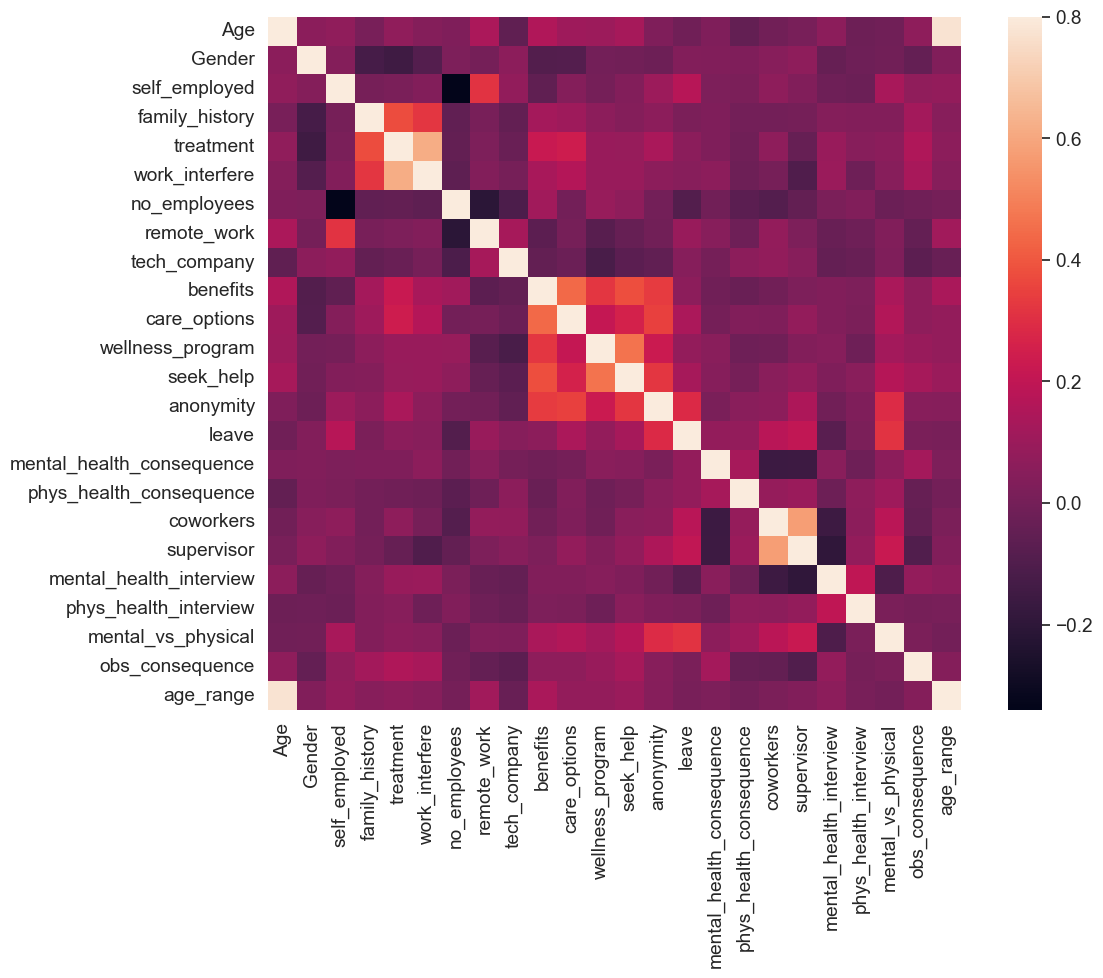

In [77]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

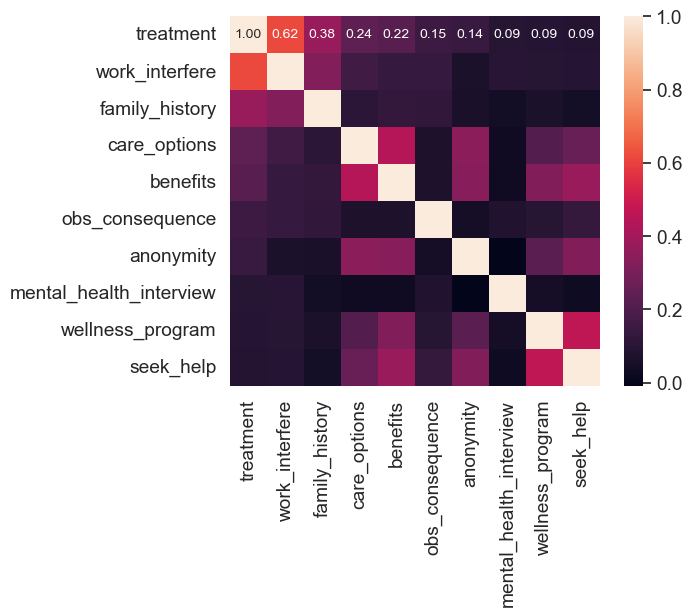

In [78]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Some charts to see data relationship

**Distribution** and density by Age

c:\Users\mahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


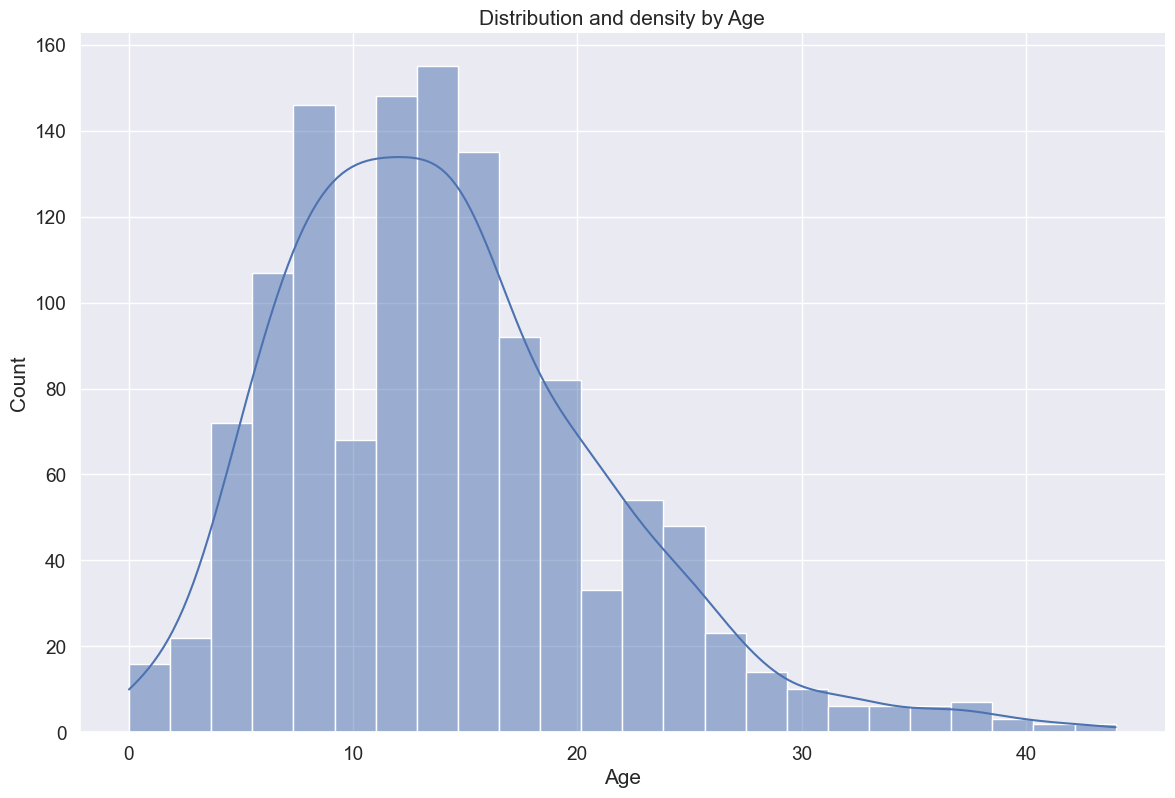

In [79]:


# Distribution and density by Age
sns.displot(train_df["Age"], bins=24, kde=True, height=8, aspect=1.5)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

plt.show()

Separate by treatment

c:\Users\mahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


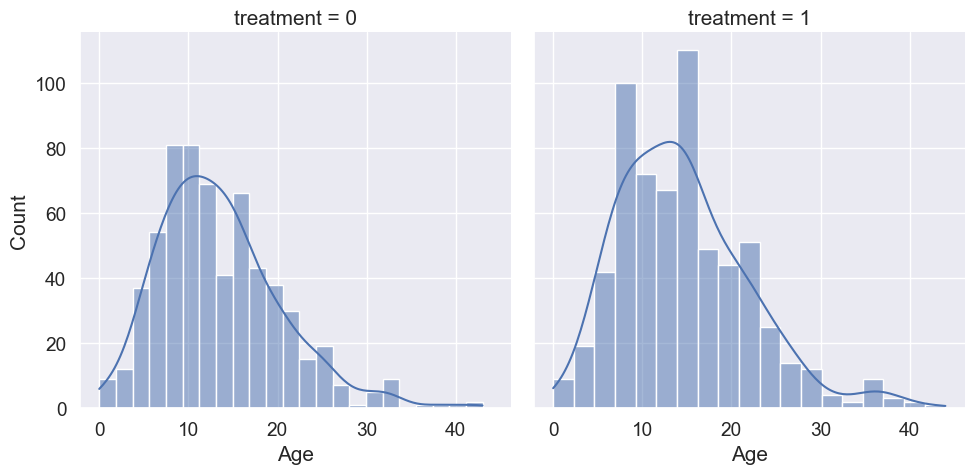

In [80]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g.map(sns.histplot, "Age", kde=True)

plt.show()

How many people has been treated?

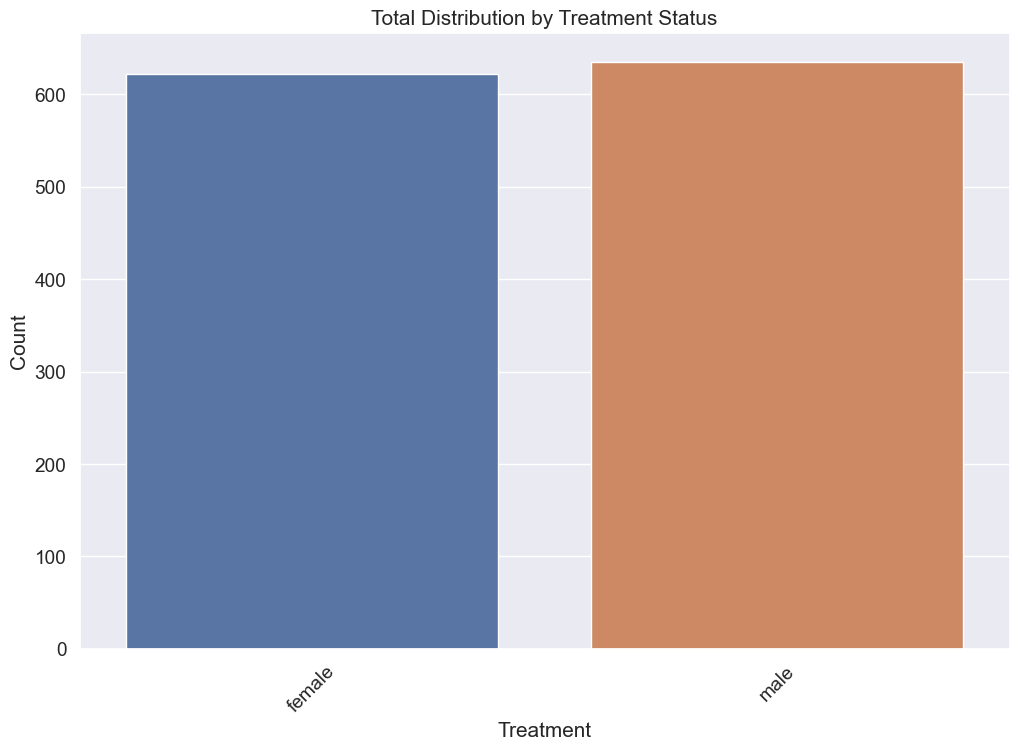

In [81]:


# Get the unique values in the treatment column
unique_treatments = train_df['treatment'].unique()
num_unique_treatments = len(unique_treatments)

# Ensure that the number of labels matches the number of unique treatments
labels = labelDict['label_Gender']
if len(labels) != num_unique_treatments:
    print(f"Warning: The number of labels ({len(labels)}) does not match the number of unique treatments ({num_unique_treatments}).")
    # Adjust labels if needed
    labels = labels[:num_unique_treatments]  # Trim labels if there are extra
    # or add more labels if necessary
    # labels = labels + ['Additional Label'] * (num_unique_treatments - len(labels))

plt.figure(figsize=(12, 8))
g = sns.countplot(x="treatment", data=train_df)

# Explicitly set tick locations and labels
g.set_xticks(range(num_unique_treatments))  # Ensure ticks match the number of labels
g.set_xticklabels(labels, rotation=45)  # Rotate labels for better readability

# Add title and labels
plt.title('Total Distribution by Treatment Status')
plt.xlabel('Treatment')
plt.ylabel('Count')

# Show the plot
plt.show()


Nested barplot to show probabilities for class and sex

C:\Users\mahar\AppData\Local\Temp\ipykernel_10892\1474332764.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


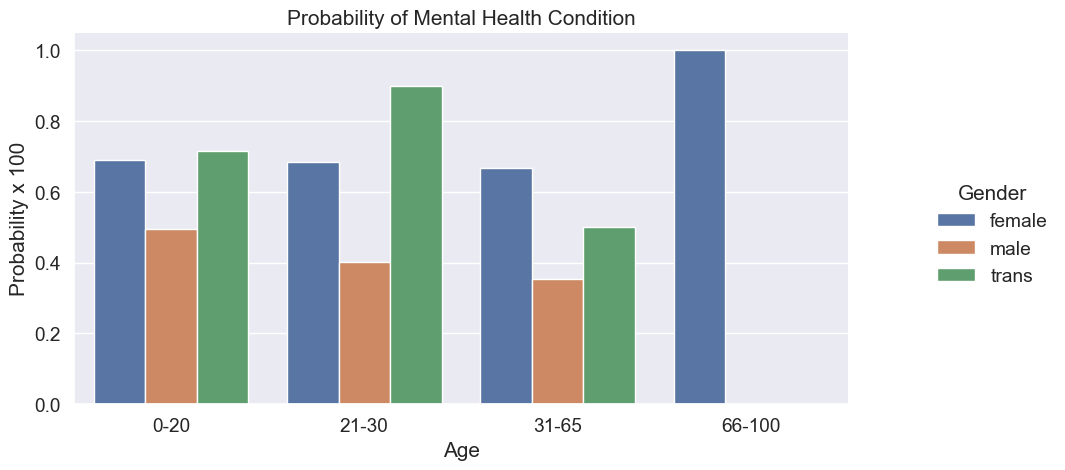

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'age_range' and 'Gender' columns to string if not already
train_df['age_range'] = train_df['age_range'].astype(str)
train_df['Gender'] = train_df['Gender'].astype(str)

# Convert labels to strings
o = [str(label) for label in labelDict.get('label_age_range', [])]
new_labels = [str(label) for label in labelDict.get('label_Gender', [])]

# Create the plot using catplot
g = sns.catplot(
    x="age_range", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    ci=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-tick labels
g.set_xticklabels(o)

# Add title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels if g._legend is not None
if g._legend:
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for family history

C:\Users\mahar\AppData\Local\Temp\ipykernel_10892\2801661618.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


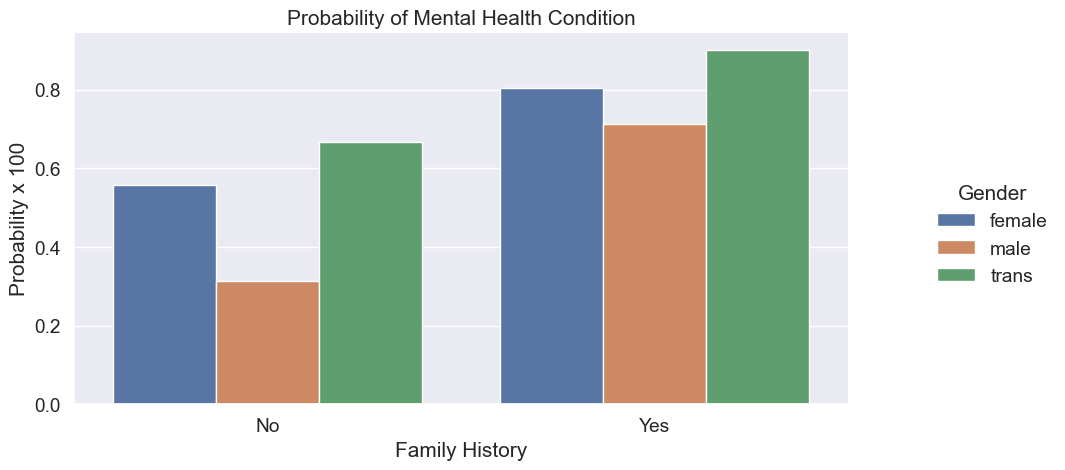

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'family_history' and 'Gender' columns to string if not already
train_df['family_history'] = train_df['family_history'].astype(str)
train_df['Gender'] = train_df['Gender'].astype(str)

# Retrieve labels for family history and gender
o = labelDict.get('label_family_history', [])
new_labels = labelDict.get('label_Gender', [])

# Create the plot using catplot
g = sns.catplot(
    x="family_history", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    ci=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-tick labels
g.set_xticklabels(o)

# Add title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels if g._legend is not None
if g._legend:
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for care options

C:\Users\mahar\AppData\Local\Temp\ipykernel_10892\2713808021.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


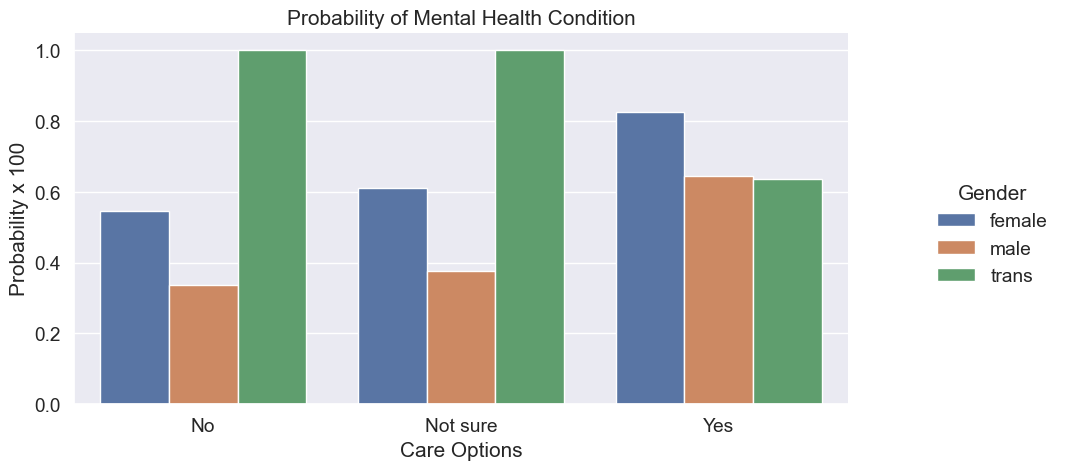

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'care_options' and 'Gender' columns to string if not already
train_df['care_options'] = train_df['care_options'].astype(str)
train_df['Gender'] = train_df['Gender'].astype(str)

# Retrieve labels for care options and gender
o = labelDict.get('label_care_options', [])
new_labels = labelDict.get('label_Gender', [])

# Create the plot using catplot
g = sns.catplot(
    x="care_options", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    ci=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-tick labels
g.set_xticklabels(o)

# Add title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# Replace legend labels if g._legend is not None
if g._legend:
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for benefits



C:\Users\mahar\AppData\Local\Temp\ipykernel_10892\1993943659.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


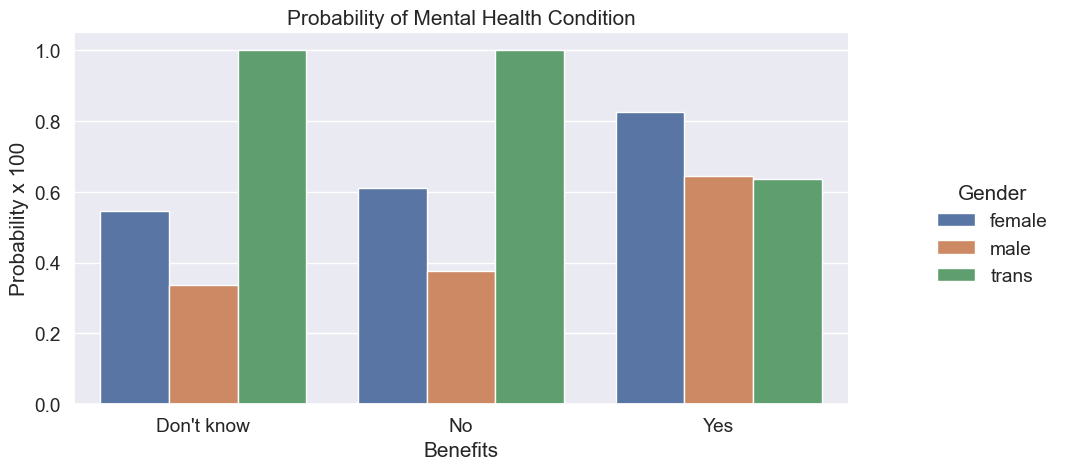

In [85]:

# Convert 'care_options' and 'Gender' columns to string if not already
train_df['care_options'] = train_df['care_options'].astype(str)
train_df['Gender'] = train_df['Gender'].astype(str)

# Retrieve labels for care options and gender
o = labelDict.get('label_benefits', [])
new_labels = labelDict.get('label_Gender', [])

# Create the plot using catplot
g = sns.catplot(
    x="care_options", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    ci=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-tick labels
g.set_xticklabels(o)

# Add title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels if g._legend is not None
if g._legend:
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for work interfere



C:\Users\mahar\AppData\Local\Temp\ipykernel_10892\1804150796.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


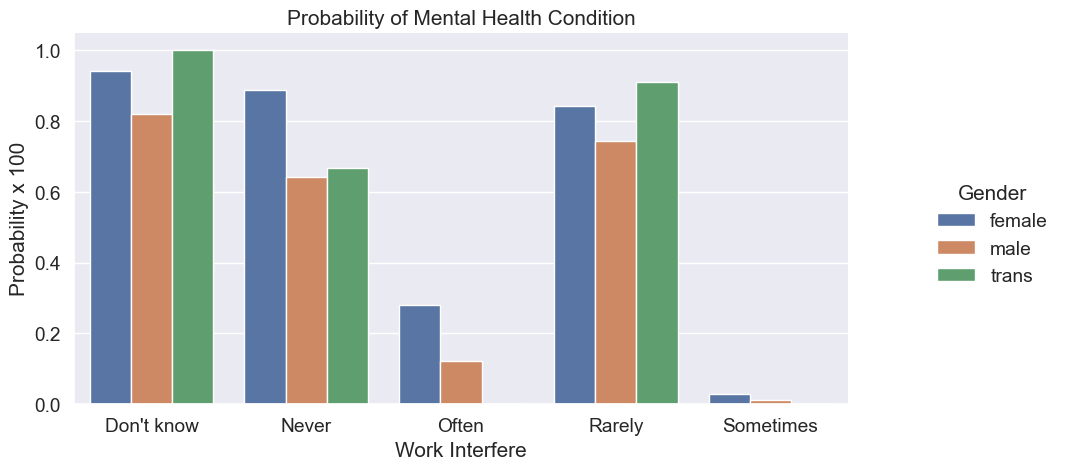

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns to string type
train_df['work_interfere'] = train_df['work_interfere'].astype(str)
train_df['Gender'] = train_df['Gender'].astype(str)

# Retrieve labels
x_labels = labelDict.get('label_work_interfere', [])
legend_labels = labelDict.get('label_Gender', [])

# Create the plot
g = sns.catplot(
    x="work_interfere", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    ci=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-tick labels and adjust legend
g.set_xticklabels(x_labels)
if g._legend:
    for t, l in zip(g._legend.texts, legend_labels):
        t.set_text(l)

# Add titles and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Adjust layout and show plot
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


Features Scaling We're going to scale age, because is extremely different from the othere ones.



In [87]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Spilitting Dataset

In [88]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

Detecting Outliers

Outliers in Age:
                Timestamp          Age              Gender         Country  \
38    2014-08-27 11:42:08           50                   M   United States   
143   2014-08-27 12:39:14          -29                Male   United States   
294   2014-08-27 14:15:57           56                Male   United States   
297   2014-08-27 14:18:41           60                male   United States   
347   2014-08-27 14:45:45           54                   M   United States   
364   2014-08-27 15:05:21          329                Male   United States   
372   2014-08-27 15:21:59           55                   M   United States   
390   2014-08-27 15:24:47  99999999999                 All        Zimbabwe   
419   2014-08-27 15:31:40           55                   M   United States   
466   2014-08-27 16:06:46           57                   M   United States   
471   2014-08-27 16:13:40           58                Male   United States   
475   2014-08-27 16:15:26           57         

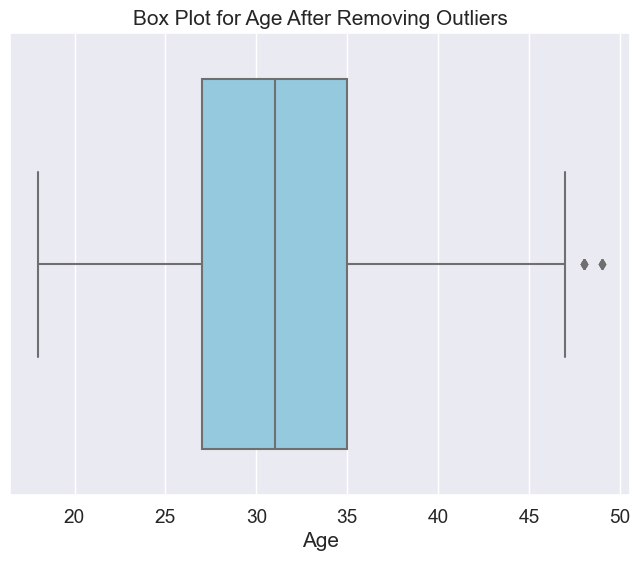

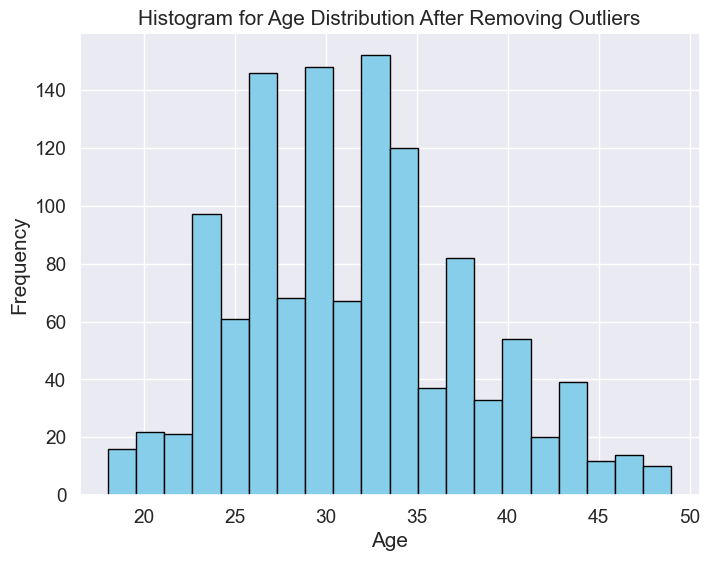

In [89]:
# Load the dataset
data = pd.read_csv('survey.csv')

# Selecting numeric columns for outlier detection (using 'Age' as an example, add more columns if needed)
numeric_columns = ['Age']

# Detecting and removing outliers using the IQR (Interquartile Range) method
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Printing outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Outliers in {column}:')
    print(outliers)
    
    # Removing outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Boxplot for 'Age' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'], color='skyblue')
plt.title('Box Plot for Age After Removing Outliers')
plt.show()

# Histogram for 'Age' after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Age Distribution After Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#Evaluating models

Logistic Regression

Accuracy: 78.57%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       120
           1       0.77      0.85      0.81       132

    accuracy                           0.79       252
   macro avg       0.79      0.78      0.78       252
weighted avg       0.79      0.79      0.78       252

Confusion Matrix:
[[ 86  34]
 [ 20 112]]


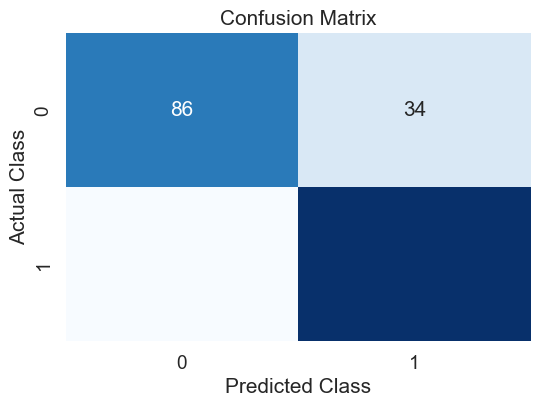

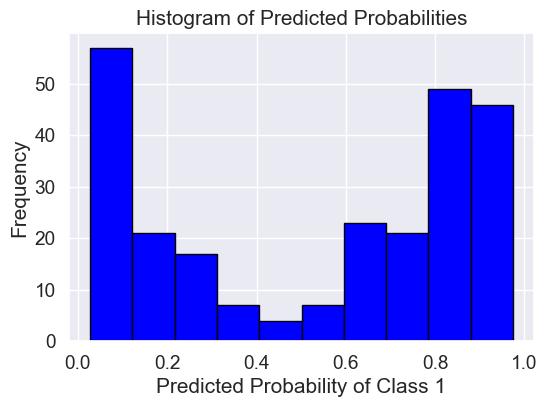

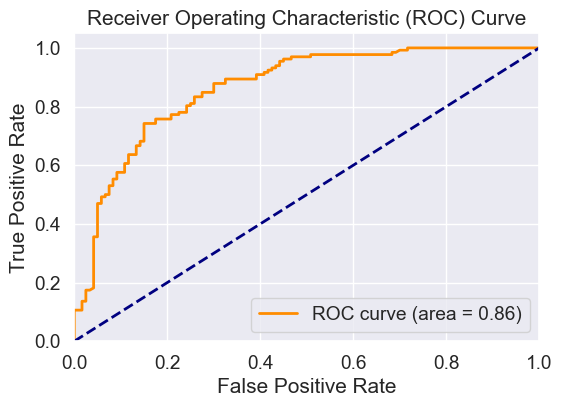

In [90]:
# Step 1: Import necessary libraries

# Step 2: Data Preprocessing (Assuming 'X' and 'y' are already defined from previous steps)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # Using max_iter=1000 to ensure convergence
log_reg.fit(X_train, y_train)

# Step 5: Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 6: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Step 8: Plot the Histogram of Predicted Probabilities
plt.figure(figsize=(6,4))
plt.hist(y_pred_prob, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.show()

# Step 9: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


KNeighbors Classifier

Accuracy: 77.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       120
           1       0.77      0.82      0.79       132

    accuracy                           0.78       252
   macro avg       0.78      0.78      0.78       252
weighted avg       0.78      0.78      0.78       252

Confusion Matrix:
[[ 88  32]
 [ 24 108]]


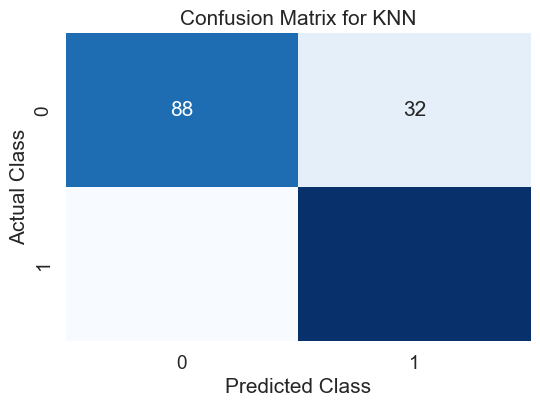

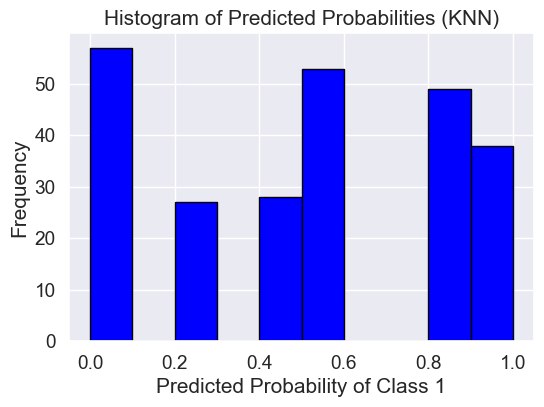

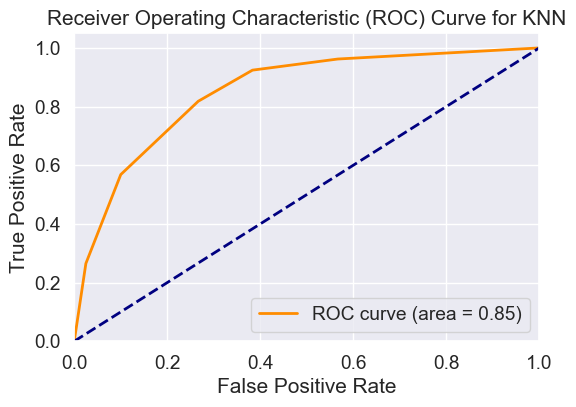

In [91]:
# Step 1: Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Preprocessing (Assuming 'X' and 'y' are already defined from previous steps)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

# Step 5: Predictions
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 6: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Step 8: Plot the Histogram of Predicted Probabilities
plt.figure(figsize=(6,4))
plt.hist(y_pred_prob, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities (KNN)')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.show()

# Step 9: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Decision Tree classifier

Accuracy: 69.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       120
           1       0.72      0.70      0.71       132

    accuracy                           0.70       252
   macro avg       0.70      0.70      0.70       252
weighted avg       0.70      0.70      0.70       252

Confusion Matrix:
[[83 37]
 [39 93]]


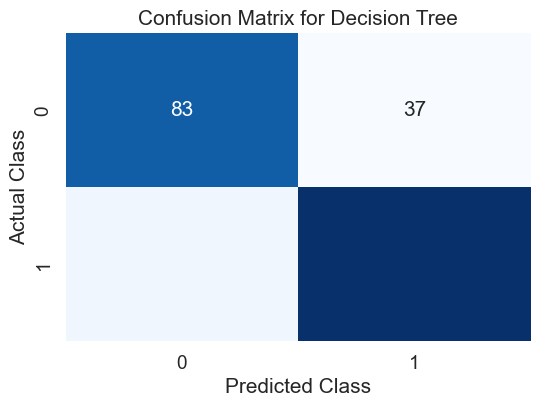

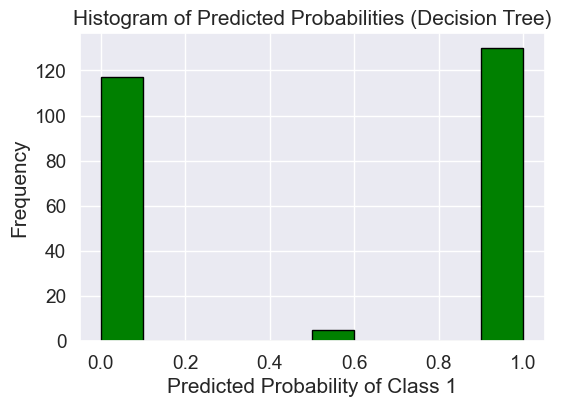

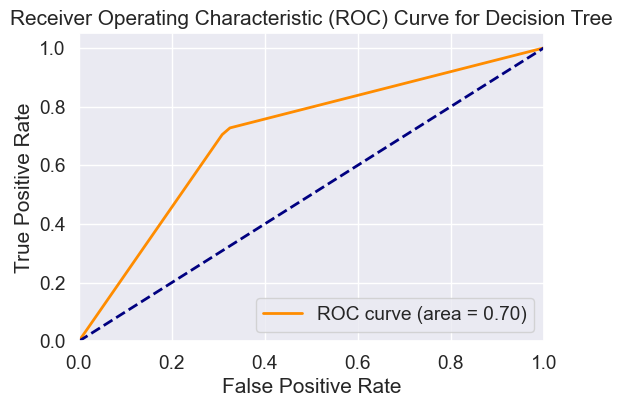

In [92]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Preprocessing (Assuming 'X' and 'y' are already defined from previous steps)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 5: Predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 6: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Step 8: Plot the Histogram of Predicted Probabilities
plt.figure(figsize=(6,4))
plt.hist(y_pred_prob, bins=10, color='green', edgecolor='black')
plt.title('Histogram of Predicted Probabilities (Decision Tree)')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.show()

# Step 9: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Random Forests

Accuracy: 76.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       120
           1       0.76      0.81      0.79       132

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252

Confusion Matrix:
[[ 87  33]
 [ 25 107]]


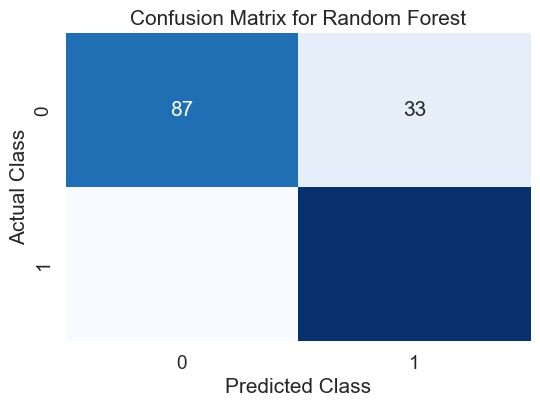

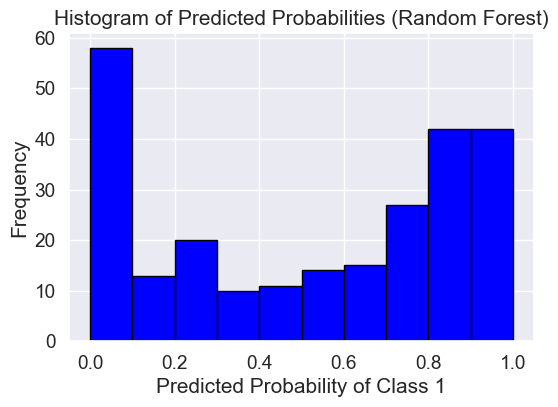

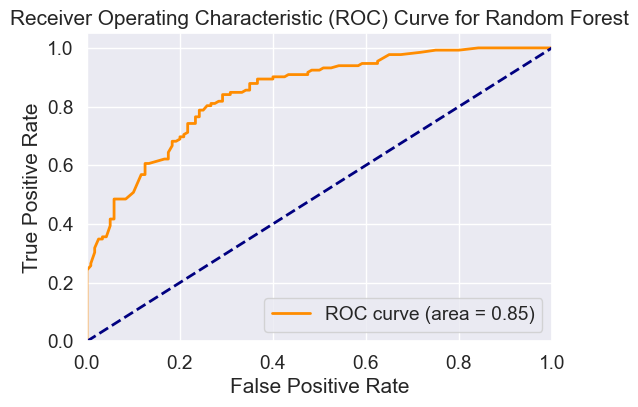

In [93]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Preprocessing (Assuming 'X' and 'y' are already defined from previous steps)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
rf.fit(X_train, y_train)

# Step 5: Predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 6: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Step 8: Plot the Histogram of Predicted Probabilities
plt.figure(figsize=(6,4))
plt.hist(y_pred_prob, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities (Random Forest)')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.show()

# Step 9: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


SVM

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('survey.csv')

# Preprocess the data
data = data.dropna(subset=['treatment', 'work_interfere', 'family_history', 'no_employees', 'mental_health_interview'])

# Cleaning gender variations
def clean_gender(gender):
    if gender.lower() in ['male', 'm', 'male ', 'cis male', 'man']:
        return 'Male'
    elif gender.lower() in ['female', 'f', 'cis female', 'woman']:
        return 'Female'
    else:
        return 'Other'

data['Gender'] = data['Gender'].apply(clean_gender)

# Encoding categorical variables
le = LabelEncoder()
data['treatment'] = le.fit_transform(data['treatment'])
data['work_interfere'] = le.fit_transform(data['work_interfere'])
data['family_history'] = le.fit_transform(data['family_history'])
data['no_employees'] = le.fit_transform(data['no_employees'])
data['mental_health_interview'] = le.fit_transform(data['mental_health_interview'])

# Selecting features and target
X = data[['family_history', 'work_interfere', 'no_employees', 'mental_health_interview']]
y = data['treatment']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predicting the target
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix as a table
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['No Treatment', 'Treatment'], columns=['Predicted No Treatment', 'Predicted Treatment'])
print("Confusion Matrix as Table:\n", cm_df)

# Classification report
report = classification_report(y_test, y_pred, target_names=['No Treatment', 'Treatment'])
print("Classification Report:\n", report)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Treatment', 'Treatment'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

# Histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Naive Bayes model

Accuracy: 74.92%
Confusion Matrix as Table:
               Predicted No Treatment  Predicted Treatment
No Treatment                      69                   35
Treatment                         40                  155
Classification Report:
               precision    recall  f1-score   support

No Treatment       0.63      0.66      0.65       104
   Treatment       0.82      0.79      0.81       195

    accuracy                           0.75       299
   macro avg       0.72      0.73      0.73       299
weighted avg       0.75      0.75      0.75       299



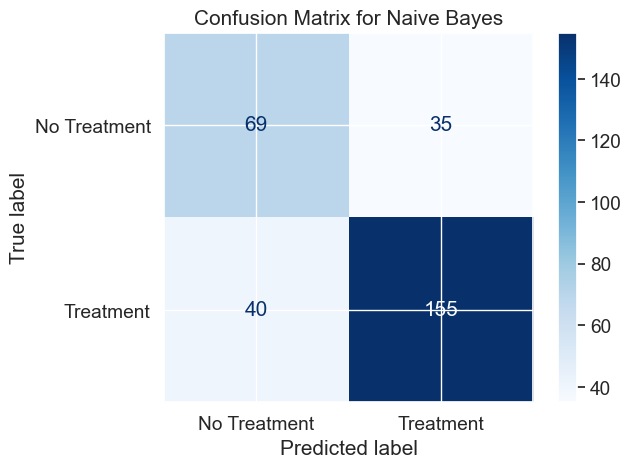

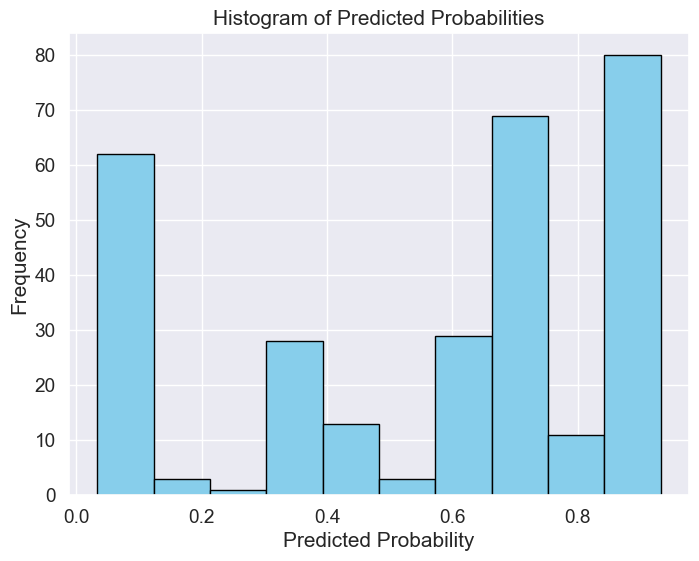

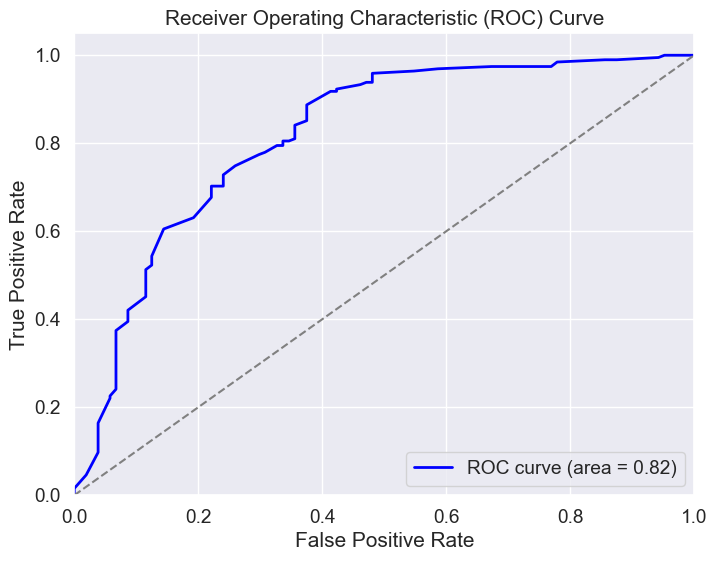

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('survey.csv')

# Preprocess the data
data = data.dropna(subset=['treatment', 'work_interfere', 'family_history', 'no_employees', 'mental_health_interview'])
data['Gender'] = data['Gender'].replace(['Male', 'M'], 'Male').replace(['Female', 'F'], 'Female')

# Encoding categorical variables
le = LabelEncoder()
data['treatment'] = le.fit_transform(data['treatment'])
data['work_interfere'] = le.fit_transform(data['work_interfere'])
data['family_history'] = le.fit_transform(data['family_history'])
data['no_employees'] = le.fit_transform(data['no_employees'])
data['mental_health_interview'] = le.fit_transform(data['mental_health_interview'])

# Selecting features and target
X = data[['family_history', 'work_interfere', 'no_employees', 'mental_health_interview']]
y = data['treatment']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting the target
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix as a table
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['No Treatment', 'Treatment'], columns=['Predicted No Treatment', 'Predicted Treatment'])
print("Confusion Matrix as Table:\n", cm_df)

# Classification report
report = classification_report(y_test, y_pred, target_names=['No Treatment', 'Treatment'])
print("Classification Report:\n", report)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Treatment', 'Treatment'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy Comparison of all models 

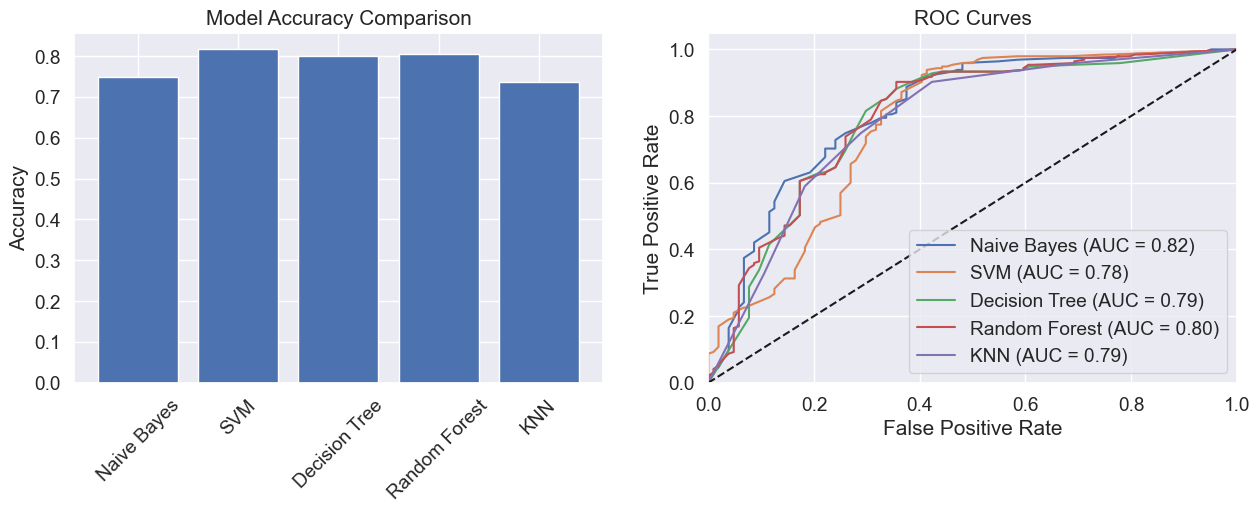

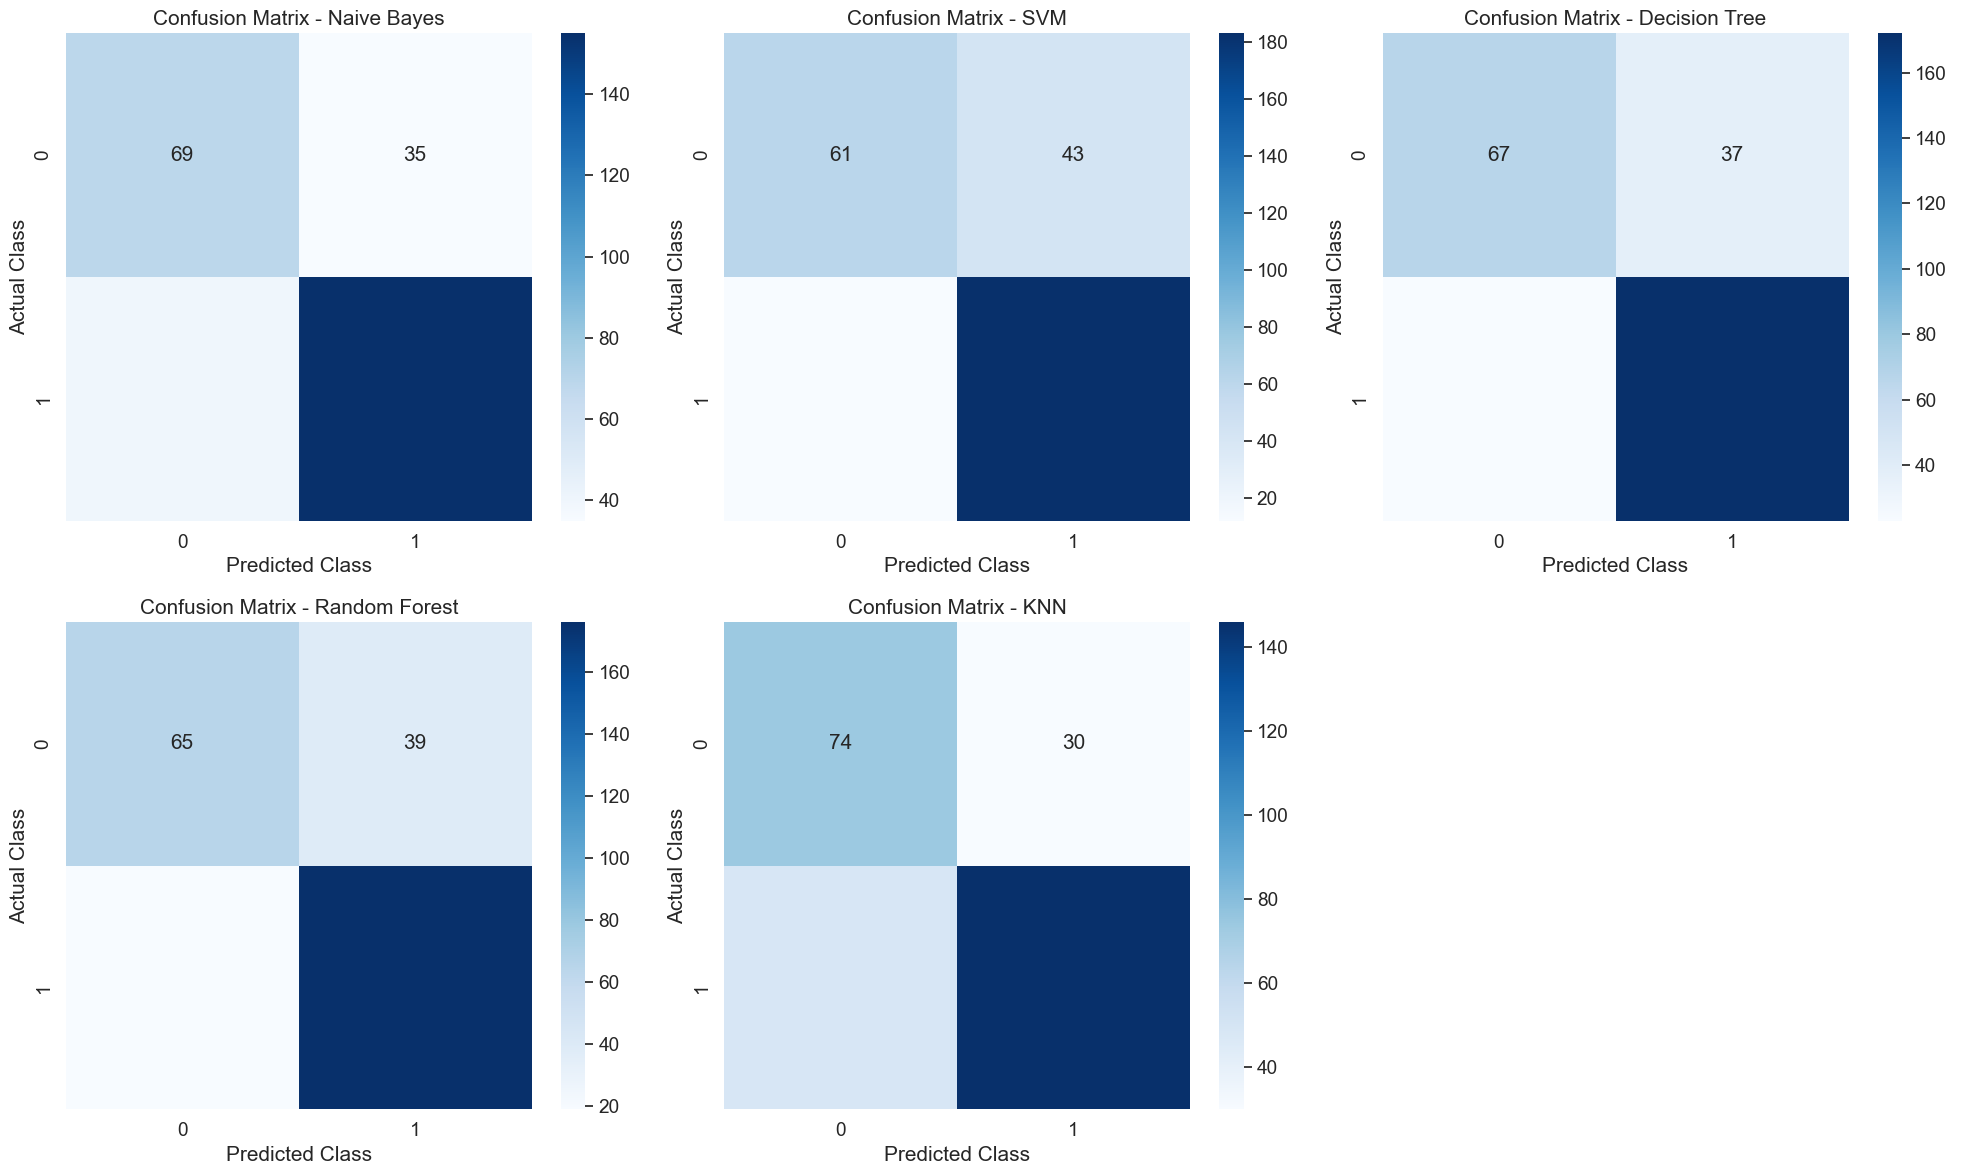


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       104
           1       0.82      0.79      0.81       195

    accuracy                           0.75       299
   macro avg       0.72      0.73      0.73       299
weighted avg       0.75      0.75      0.75       299


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.59      0.69       104
           1       0.81      0.94      0.87       195

    accuracy                           0.82       299
   macro avg       0.82      0.76      0.78       299
weighted avg       0.82      0.82      0.81       299


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       104
           1       0.82      0.88      0.85       195

    accuracy                           0.80       299
   macro avg  

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = pd.read_csv('survey.csv')
data = data.dropna(subset=['treatment', 'work_interfere', 'family_history', 'no_employees', 'mental_health_interview'])

def clean_gender(gender):
    if gender.lower() in ['male', 'm', 'male ', 'cis male', 'man']:
        return 'Male'
    elif gender.lower() in ['female', 'f', 'cis female', 'woman']:
        return 'Female'
    else:
        return 'Other'

data['Gender'] = data['Gender'].apply(clean_gender)

le = LabelEncoder()
categorical_columns = ['treatment', 'work_interfere', 'family_history', 'no_employees', 'mental_health_interview']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

X = data[['family_history', 'work_interfere', 'no_employees', 'mental_health_interview']]
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train models and collect results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'y_pred_prob': y_pred_prob
    }

# Visualizations
plt.figure(figsize=(15, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
accuracies = [results[model]['accuracy'] for model in models]
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# ROC curves
plt.subplot(2, 2, 2)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")

# Confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_ylabel('Actual Class')
    axes[i].set_xlabel('Predicted Class')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Print classification reports
for name, result in results.items():
    print(f"\nClassification Report for {name}:")
    print(result['classification_report'])

Overfiting and Underfitting of each the model

<Figure size 1200x800 with 0 Axes>

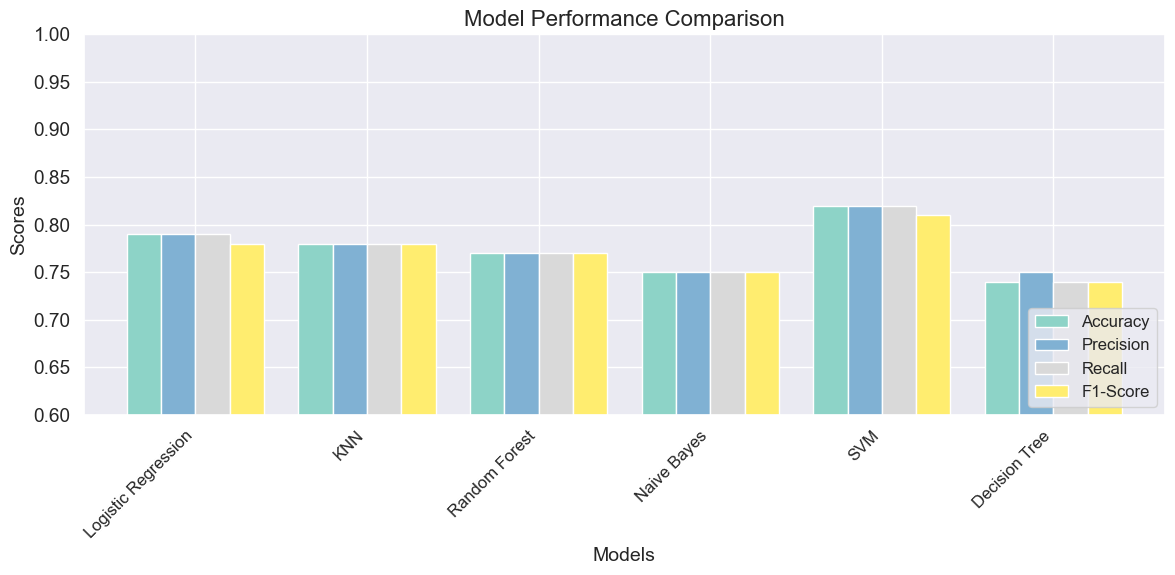

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data: Accuracy, Precision (Weighted Avg), Recall (Weighted Avg), F1-Score (Weighted Avg)
model_performance = {
    'Logistic Regression': [0.79, 0.79, 0.79, 0.78],
    'KNN': [0.78, 0.78, 0.78, 0.78],
    'Random Forest': [0.77, 0.77, 0.77, 0.77],
    'Naive Bayes': [0.75, 0.75, 0.75, 0.75],
    'SVM': [0.82, 0.82, 0.82, 0.81],
    'Decision Tree': [0.74, 0.75, 0.74, 0.74]
}

# Convert dictionary to lists for plotting
models = list(model_performance.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
data = np.array(list(model_performance.values()))

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(data, index=models, columns=metrics)

# Plotting
plt.figure(figsize=(12, 8))
df.plot(kind='bar', figsize=(12, 6), colormap='Set3', width=0.8)

# Add labels and title
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0.6, 1.0)  # Adjust based on the range of your metrics

# Display the legend and plot
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# Assuming `X` are features and `y` is the target variable
# X, y = ...

# Define the models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store performance metrics for each model
results = {}

# Function to evaluate model performance
def evaluate_model(model, X, y):
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precisions = cross_val_score(model, X, y, cv=kf, scoring='precision')
    recalls = cross_val_score(model, X, y, cv=kf, scoring='recall')
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    
    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores)
    }

# Evaluate each model
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X, y)

# Display the results for each model
results_df = pd.DataFrame(results).T
results_df = results_df[['accuracy', 'precision', 'recall', 'f1_score']]
print(results_df)


                     accuracy  precision    recall  f1_score
Logistic Regression  0.735678   0.748683  0.883736  0.809599
Random Forest        0.786935   0.787702  0.905905  0.839274
KNeighbors           0.754774   0.784677  0.852314  0.815448
Decision Tree        0.780905   0.790140  0.894769  0.838408
SVM                  0.789950   0.771710  0.952851  0.852220
Naive Bayes          0.745729   0.771767  0.855615  0.810425
